In [160]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import datetime
import seaborn as sns
import itertools

9.56951280877238

<Figure size 432x288 with 0 Axes>

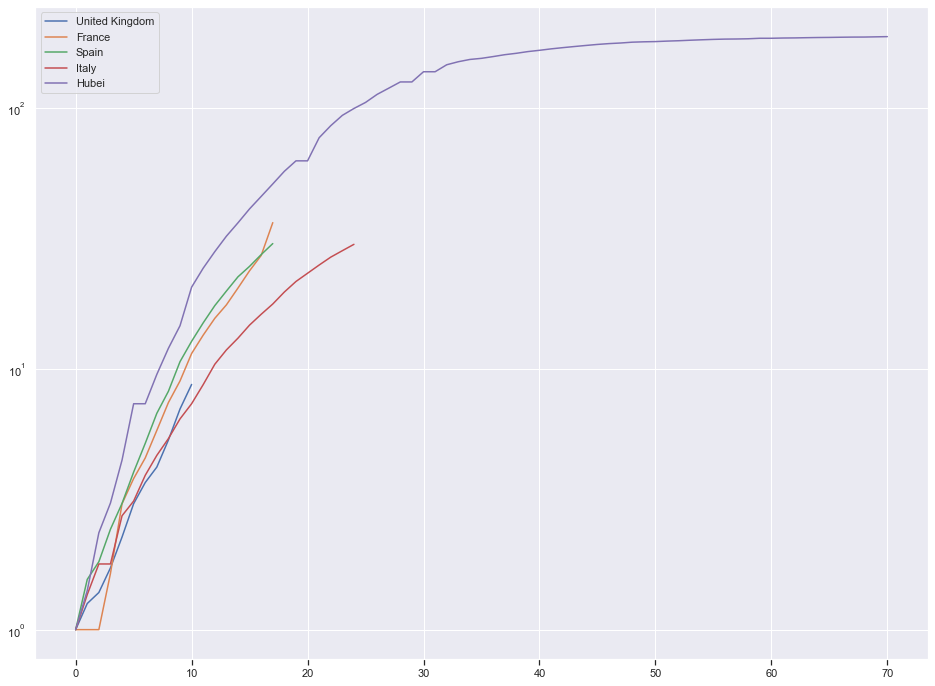

In [161]:
start = 0
data = pandas.read_csv('selected.csv')
dates = pandas.to_datetime(data.columns[4+start:])
columns = [(i if i else j) for (i,j) in data.iloc[:,:2].fillna('').to_numpy()]

tdata = data.iloc[:,4+start:].T.to_numpy()
# Normalize to populations. It makes no sense to compare otherwise.
populations = [67886011,65273511,46754778,60461826, 59020000]
lockdowns = pandas.to_datetime(['2020-03-23', '2020-03-16', '2020-03-16','2020-03-09', '2020-01-23'])
rawdata = pandas.DataFrame(tdata, dates, columns=columns)


vs = dict(zip(dates, itertools.count()))

data = rawdata  / populations
columns
# data = np.exp(np.log(1e-12 + data).rolling(7).mean())
tdata = rawdata.to_numpy()
vdata = rawdata.to_numpy()
slices = [slice(vs[i], None) for i in lockdowns]

plt.figure()
plt.figure(figsize=(16,12))

ll = [vdata[s,n][0] for n, s in enumerate(slices)]

xdata = [vdata[s, n] / vdata[s, n][0] for n, s in enumerate(slices)]
plt.semilogy()
for n, v in enumerate(xdata):
    plt.plot(v, label=columns[n])
    
plt.legend()
xdata[0][-1]

(np.log2(10) / np.log2(2)) * 9 / np.log2(xdata[0][-1])

In [162]:
cid = 2
l = np.log(rawdata.iloc[-1,2])
x = l - np.log(rawdata.iloc[-2,2])
# rawdata.iloc[-1,0]
np.exp(l + x) - rawdata.iloc[-1, 2] # Crude prediction for UK

1059.3829764567927

<ipython-input-148-716a58bb1e6c>:1: RuntimeWarning: divide by zero encountered in true_divide
  d2n = np.log(abs((tdata[2:,:] + tdata[:-2,:] - 2*tdata[1:-1,:]) / (tdata[1:-1,:])))
<ipython-input-148-716a58bb1e6c>:1: RuntimeWarning: invalid value encountered in true_divide
  d2n = np.log(abs((tdata[2:,:] + tdata[:-2,:] - 2*tdata[1:-1,:]) / (tdata[1:-1,:])))
<ipython-input-148-716a58bb1e6c>:1: RuntimeWarning: divide by zero encountered in log
  d2n = np.log(abs((tdata[2:,:] + tdata[:-2,:] - 2*tdata[1:-1,:]) / (tdata[1:-1,:])))


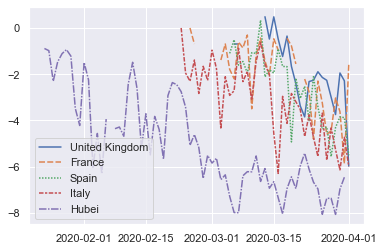

In [148]:
d2n = np.log(abs((tdata[2:,:] + tdata[:-2,:] - 2*tdata[1:-1,:]) / (tdata[1:-1,:])))
d2n = pandas.DataFrame(d2n, dates[1:-1], columns=columns)
sns.set_style("darkgrid")
sns.lineplot(data=d2n)

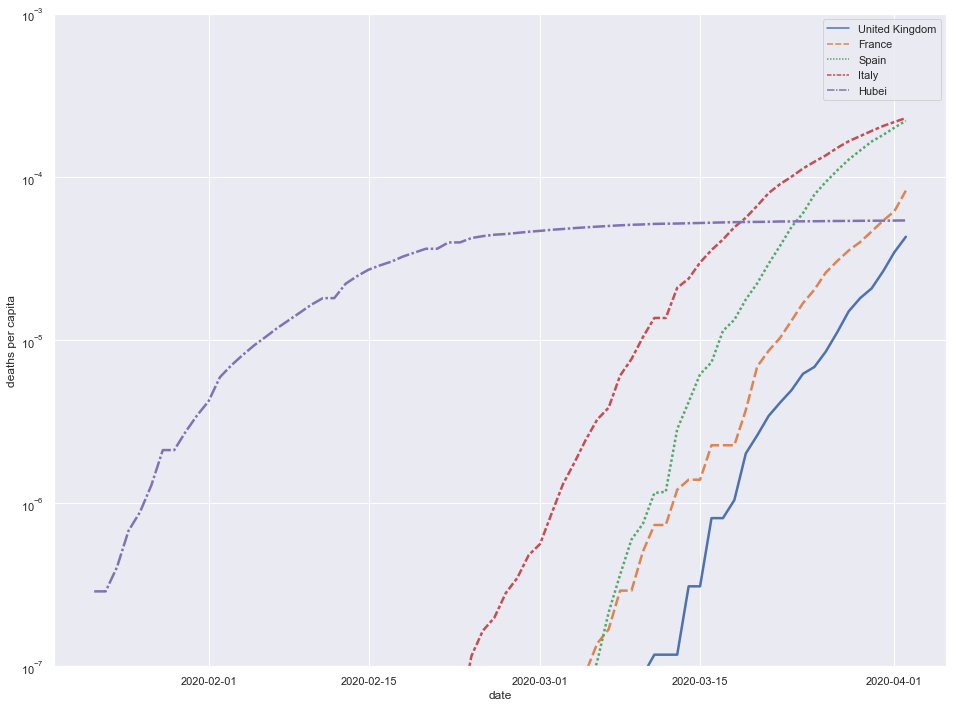

In [149]:
plt.figure(figsize=(16,12))
plt.ylim(1e-7, 1e-3)
# plt.ylim(100, 100000)
plt.xlabel('date')
plt.ylabel('deaths per capita')
minorLocator = matplotlib.ticker.MultipleLocator(1)

sns.set_style("darkgrid")
sns.set()
plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : False})
g = sns.lineplot(data=data, linewidth=2.5)
g.xaxis.set_minor_locator(minorLocator)
g.set_yscale('log')

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      